# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.3 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from multiagents import MultiAgents
from collections import namedtuple, deque
from unityagents import UnityEnvironment

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis",no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [5]:
max_num_timesteps = 1500
n_episodes=3000
random_seed=0

In [7]:
agent = MultiAgents(num_agents=2, state_size=state_size, action_size=action_size, random_seed=random_seed)

In [8]:
def train():
    init_time = time.time()
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    t0 = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        agent_scores = np.zeros(num_agents)
        for t_step in range(max_num_timesteps):
            actions = agent.act(states)
            next_env_info = env.step(actions)[brain_name]
            next_states, rewards, dones = next_env_info.vector_observations, next_env_info.rewards, next_env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            agent_scores = agent_scores + rewards
            states = next_states
            if np.any(dones):
                break
                
        scores_deque.append(np.max(agent_scores))
        scores.append(np.max(agent_scores))
        score_average = np.mean(scores_deque)
        t1 = (time.time()-t0)/60.
        
        print(f'Episode: {i_episode}\tTime(Min): {round(t1,2)}\tMax: {round(np.max(scores),2)}\tMin: {round(np.min(scores),2)}\tAvg queue: {round(np.mean(scores_deque),2)}')
        
        if len(scores_deque) == 100 and score_average >=0.5:
            print('Completed!')
            env.close()
            agent.save_maddpg()
            break
    return scores

In [9]:
%%time
results = train()

Episode: 1	Time(Min): 0.0	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 2	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 3	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 4	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 5	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 6	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 7	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 8	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 9	Time(Min): 0.03	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 10	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 11	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 12	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 13	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 14	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 15	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 16	Time(Min): 0.04	Max: 0.0	Min: 0.0	Avg queue: 0.0
Episode: 17	Time(Min): 0.04	Max: 0

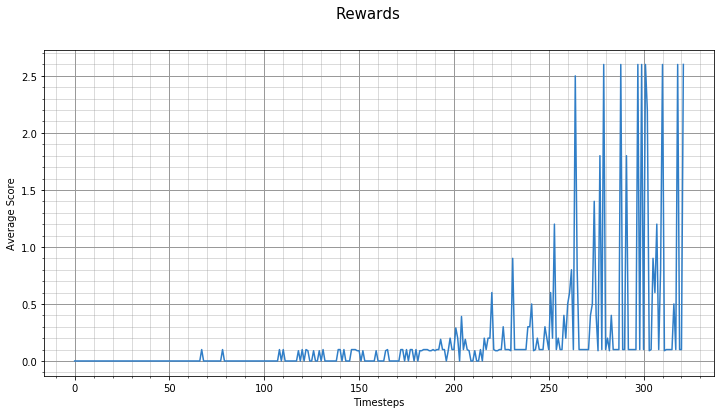

In [10]:
def plot_results(scores):
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle("Rewards", fontsize=15)
    ax.plot(scores, color="#307EC7", label="line")
    ax.set_xlabel("Timesteps")
    ax.set_ylabel("Average Score")
    # GRID
    ax.grid(True)
    ax.grid(b=True, which='major', color='#999999', linestyle='-', linewidth=1)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.7,linewidth=0.5)
    fig.savefig("learning.jpg")
    
plot_results(results)